<a href="https://colab.research.google.com/github/nidhishtk/Assignment-03-Hypothesis-Testing-/blob/main/Q1_Cutlets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (5,3)
plt.rcParams['figure.dpi'] = 200

# 1. A F&B manager wants to determine whether there is any significant difference in the diameter of the cutlet between two units. A randomly selected sample of cutlets was collected from both units and measured? Analyze the data and draw inferences at 5% significance level. Please state the assumptions and tests that you carried out to check validity of the assumptions.

- **Minitab File : Cutlets.mtw**

In [4]:
from google.colab import files
df = files.upload()

df = pd.read_csv('Cutlets.csv')
df.head()

Saving Cutlets.csv to Cutlets (1).csv


,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522


## Performing EDA on the given dataset

## Applying Descriptive Statistics

In [5]:
df.describe()

,Unit A,Unit B
count,35.000000,35.000000
mean,7.019091,6.964297
std,0.288408,0.343401
min,6.437600,6.038000
25%,6.831500,6.753600
50%,6.943800,6.939900
75%,7.280550,7.195000
max,7.516900,7.545900


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Unit A  35 non-null     float64
 1   Unit B  35 non-null     float64
dtypes: float64(2)
memory usage: 688.0 bytes


In [7]:
df.isna().sum()

Unit A    0
Unit B    0
dtype: int64

## Visualizing The Data

<Axes: xlabel='Unit A', ylabel='Count'>

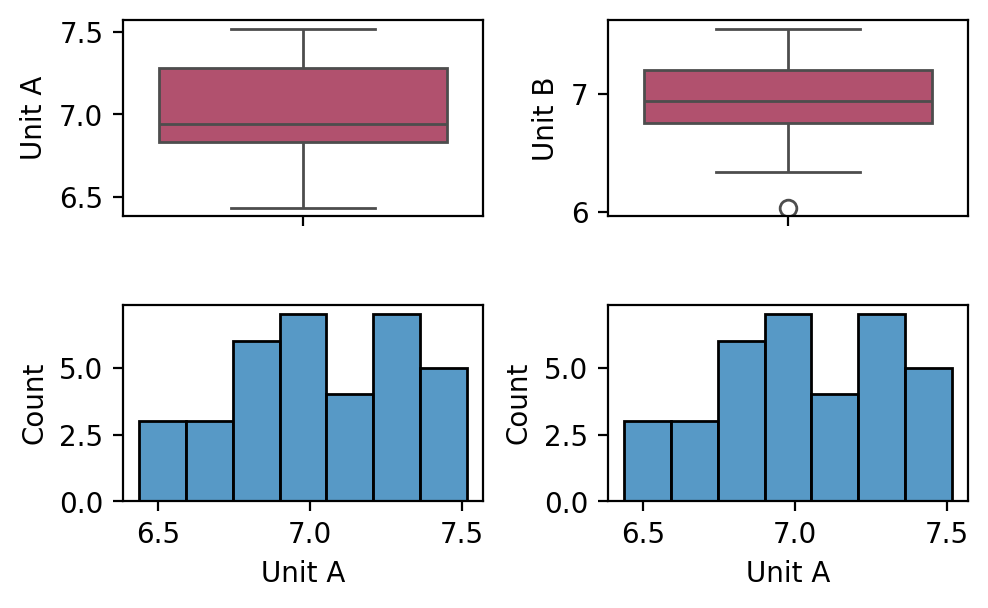

In [8]:
fig,ax = plt.subplots(2,2)
plt.tight_layout()

sns.boxplot(df['Unit A'], ax = ax[0,0], palette = 'flare')
sns.boxplot(df['Unit B'], ax = ax[0,1], palette = 'flare')
sns.histplot(df['Unit A'], ax = ax[1,0])
sns.histplot(df['Unit A'], ax = ax[1,1])

## Outlier Detection

In [11]:
def remove_outlier(df,col):
  q1 = df[col].quantile(0.25)
  q3 = df[col].quantile(0.75)
  iqr = q3-q1

  upper = q3 + (iqr*1.5)
  lower = q1 - (iqr*1.5)

  df = df[(df[col]>lower) & (df[col]<upper)]

  return df

In [12]:
df = remove_outlier(df,'Unit B')

<Axes: ylabel='Unit B'>

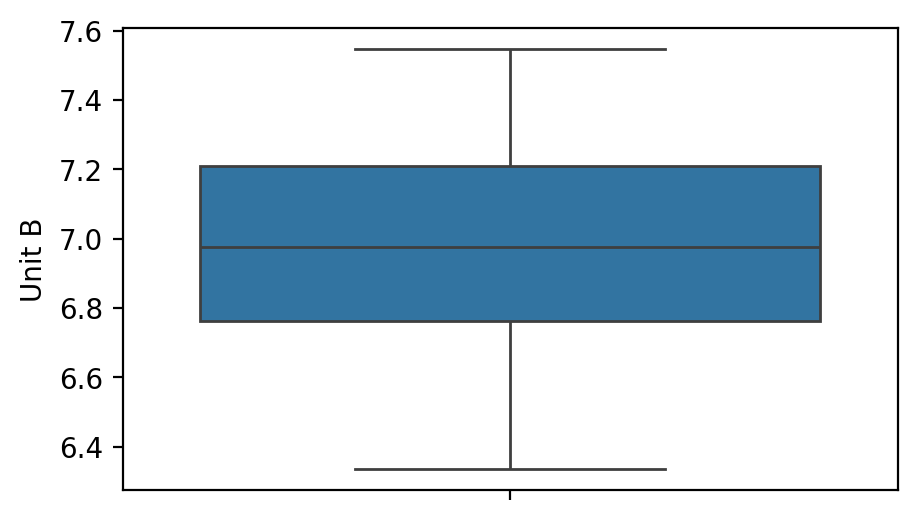

In [13]:
sns.boxplot(df['Unit B'])

## Executing Hypothesis Testing

- **H**(o) : Cutlets diameter of Unit A = Cutlets diameter of Unit B
- **H**(a) : Cutlets diameter of Unit A != Cutlets diameter of Unit B

**Alpha value** : 0.05(*it a 2 tail, 2 sample test*)

In [14]:
alpha =0.05
statistic,pvalue = st.ttest_ind(df["Unit A"],df["Unit B"])
if pvalue > alpha :
  print("Fail to reject the null hypothesis \n Cutlets diameter of Unit A = Cutlets diameter of Unit B")
else :
  print("rejecting the null hypothesis\n Cutlets diameter of Unit A != Cutlets diameter of Unit B")

Fail to reject the null hypothesis 
 Cutlets diameter of Unit A = Cutlets diameter of Unit B
